#***Analyzing and Predicting Progress of COVID-19 Vaccination***

---


**IS833 Business Analytics Project - Team 5**

Tuan Cao, Firdaus Faiz, Ansh Patil, Max Renaerts, Amogh Vadjikar, Nancy Vega 

---



## **Dataset link:**
Source: COVID-19 World Vaccination Progress (Daily and Total Vaccination for COVID-19 in the World from Our World in Data)

Kaggle link: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv

#### Original Source: 
COVID-19 Dataset by Our World in Data ([link](https://github.com/owid/covid-19-data#covid-19-dataset-by-our-world-in-data))

*   Confirmed cases and deaths: our data comes from the COVID-19 Data Repository by the Center for Systems Science and Engineering ([CSSE](https://github.com/CSSEGISandData/COVID-19)) at Johns Hopkins University (JHU). We discuss how and when JHU collects and publishes this data here. The cases & deaths [dataset](https://ourworldindata.org/coronavirus-source-data) is updated daily.
*  Hospitalizations and intensive care unit (ICU) admissions: our data is collected from official sources and collated by Our World in Data. The complete list of country-by-country sources is available here.
Testing for COVID-19: this data is collected by the Our World in Data team from official reports; you can find further details in our post on COVID-19 testing, including our checklist of questions to understand testing data, information on geographical and temporal coverage, and detailed country-by-country source information. The testing dataset is updated around twice a week.
Vaccinations against COVID-19: this data is collected by the Our World in Data team from official reports.
Other variables: this data is collected from a variety of sources (United Nations, World Bank, Global Burden of Disease, Blavatnik School of Government, etc.). More information is available in our codebook.




## Introduction & Project Objective
Since late 2019, we have been living in a global pandemic known as COVID-19.
Thanks to the vaccine, we were able to survive the pandemic. Our notebook will guide you through the distribution of the different vaccine brands over time, provide a geographical overview and predict the vaccination rate.


## **Problem:**

Our goal is to track COVID-19 vaccine adoption in the World. We will analyze the rate of people getting vaccinated per day in each country and the types of vaccine used. Additionally using the historical data, we hope to predict the progress of vaccination and immunization status in these countries.

## Data importation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Enlarge charts produced
plt.rcParams["figure.figsize"] = (20,10)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload file from Kaggle to be read here 
# pd.read_csv("drive/MyDrive/Business Analytics_IS883_Team Project/country_vaccinations.csv")

country_vaccine = pd.read_csv("drive/MyDrive/Business Analytics_IS833_Team Project/country_vaccinations.csv") 
company_vaccine = pd.read_csv("drive/MyDrive/Business Analytics_IS833_Team Project/country_vaccinations_by_manufacturer.csv") 

country_vaccine.head()

country iso_code      date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  22-02-21                 0.0                0.0   
1  Afghanistan      AFG  23-02-21                 NaN                NaN   
2  Afghanistan      AFG  24-02-21                 NaN                NaN   
3  Afghanistan      AFG  25-02-21                 NaN                NaN   
4  Afghanistan      AFG  26-02-21                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [ ]:
# Table 2
company_vaccine.head()

location        date             vaccine  total_vaccinations
0  Argentina  2020-12-29             Moderna                   2
1  Argentina  2020-12-29  Oxford/AstraZeneca                   3
2  Argentina  2020-12-29   Sinopharm/Beijing                   1
3  Argentina  2020-12-29           Sputnik V               20481
4  Argentina  2020-12-30             Moderna                   2

## Data Categories



The data (country vaccinations) contains the following information:

*   **Country** - this is the country for which the vaccination information is provided;
*   **Country ISO Code** - ISO code for the country;
*   **Date** - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
*   **Total number of vaccinations** - this is the absolute number of total immunizations in the country;
*   **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
*   **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
*   **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;
*   **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;
*   **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;
*   **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;
*   **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;
*   **Number of vaccinations per day** - number of daily vaccination for that day and country;
*   **Daily vaccinations per million** - ratio (in ppm) between vaccination number and total population for the current date in the country;
*   **Vaccines used in the country** - total number of vaccines used in the country (up to date);
*   **Source name** - source of the information (national authority, international organization, local organization etc.);
*   **Source website** - website of the source of information;

















## Data Cleaning and Validation Checks

In [ ]:
# Sample code to reformat DMY to YMD
country_vaccine['date'] = pd.to_datetime(country_vaccine['date'], format='%d-%m-%y').dt.strftime("%Y-%m-%d")
# Display country_vaccine with new date format
country_vaccine.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [ ]:
## Sample code to reformat DMY to YMD (^Now changed to pandas function)

# import datetime
# datetime.datetime.strptime("21-12-2008", "%d-%m-%Y").strftime("%Y-%m-%d")

## Reformat date from DMY to YMD
# for i in range(len(country_vaccine)):
#   country_vaccine['date'].iloc[i] = country_vaccine['date'].iloc[i][0:6] + '20' + country_vaccine['date'].iloc[i][6:]
#   country_vaccine['date'].iloc[i] = datetime.datetime.strptime(country_vaccine['date'].iloc[i], "%d-%m-%Y").strftime("%Y-%m-%d")

In [ ]:
# Display maximum date in timeline
country_vaccine["date"].max()

'2022-03-29'

In [ ]:
# Display minimum date in timeline
country_vaccine["date"].min()

'2020-12-02'

In [ ]:
country_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
company_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
company_vaccine['date'].max()

'2022-03-30'

In [ ]:
company_vaccine['date'].min()

'2020-12-04'

In [ ]:
#Pivot Table to have each Vaccine's trend in columns 
new_company_vaccine = company_vaccine.pivot(index=['location', 'date'], columns='vaccine',values='total_vaccinations')
new_company_vaccine = new_company_vaccine.fillna(0)
new_company_vaccine

vaccine               CanSino  Covaxin  Johnson&Johnson  Moderna  Novavax  \
location  date                                                              
Argentina 2020-12-29      0.0      0.0              0.0      2.0      0.0   
          2020-12-30      0.0      0.0              0.0      2.0      0.0   
          2020-12-31      0.0      0.0              0.0      2.0      0.0   
          2021-01-01      0.0      0.0              0.0      2.0      0.0   
          2021-01-02      0.0      0.0              0.0      2.0      0.0   
...                       ...      ...              ...      ...      ...   
Uruguay   2022-03-25      0.0      0.0              0.0      0.0      0.0   
          2022-03-26      0.0      0.0              0.0      0.0      0.0   
          2022-03-27      0.0      0.0              0.0      0.0      0.0   
          2022-03-28      0.0      0.0              0.0      0.0      0.0   
          2022-03-29      0.0      0.0              0.0      0.0      0.0   

vaccine               Oxford/AstraZeneca  Pfizer/BioNTech  Sinopharm/Beijing  \
location  date                                                                 
Argentina 2020-12-29                 3.0              0.0                1.0   
          2020-12-30                 3.0              0.0                1.0   
          2020-12-31                 3.0              0.0                1.0   
          2021-01-01                 5.0              0.0                1.0   
          2021-01-02                 6.0              0.0                1.0   
...                                  ...              ...                ...   
Uruguay   2022-03-25             90732.0        2473572.0                0.0   
          2022-03-26             90732.0        2473582.0                0.0   
          2022-03-27             90732.0        2473582.0                0.0   
          2022-03-28             90732.0        2475706.0                0.0   
          2022-03-29             90732.0        2476595.0                0.0   

vaccine                 Sinovac  Sputnik V  
location  date                              
Argentina 2020-12-29        0.0    20481.0  
          2020-12-30        0.0    40583.0  
          2020-12-31        0.0    43388.0  
          2021-01-01        0.0    43513.0  
          2021-01-02        0.0    46824.0  
...                         ...        ...  
Uruguay   2022-03-25  3247932.0        0.0  
          2022-03-26  3247932.0        0.0  
          2022-03-27  3247932.0        0.0  
          2022-03-28  3247932.0        0.0  
          2022-03-29  3247932.0        0.0  

[9046 rows x 10 columns]

In [ ]:
# India data is not available in the 2nd table <country_vaccinations_by_manufacturer.csv> from source
company_test = company_vaccine.groupby(['location','vaccine'])[['total_vaccinations']].max()
company_test.reset_index(inplace=True)
company_test=company_test[company_test['location']=='India']
company_test

Empty DataFrame
Columns: [location, vaccine, total_vaccinations]
Index: []

In [ ]:
#Display the latest values for each Country-Vaccine combination 
## Since, the total_vaccinations column is cumulative, max(total_vaccinations) will generate the latest value
company_vaccine_aggr = company_vaccine.groupby(['location','vaccine'])[['total_vaccinations']].max()
company_vaccine_aggr.reset_index(inplace=True)
company_vaccine_aggr.sort_values(['total_vaccinations'], ascending=[False], inplace=True)

company_aggr = company_vaccine.groupby(['location'])[['total_vaccinations']].max()
company_aggr.reset_index(inplace=True)
company_aggr=company_aggr[company_aggr['location']!='European Union']
#company_vaccine_aggr=company_vaccine_aggr[company_vaccine_aggr['location']!='European Union']
#company_vaccine_aggr
company_aggr.sort_values(['total_vaccinations'], ascending=[False], inplace=True)
company_vaccine_aggr=company_aggr.merge(company_vaccine_aggr,on='location',how='inner')
company_vaccine_aggr.columns=['location','country_max','vaccine','total_vaccinations']
company_vaccine_aggr.head()

location  country_max          vaccine  total_vaccinations
0  United States    330748673  Pfizer/BioNTech           330748673
1  United States    330748673          Moderna           210341785
2  United States    330748673  Johnson&Johnson            18563903
3        Germany    126041243  Pfizer/BioNTech           126041243
4        Germany    126041243          Moderna            29435818

In [ ]:
#Comment: Min sorting and max sorting

In [ ]:
df = company_vaccine_aggr
df['Rank']=df['country_max'].rank(ascending=False,method='dense')
df=df[df['Rank']<=10]
df.head()

location  country_max          vaccine  total_vaccinations  Rank
0  United States    330748673  Pfizer/BioNTech           330748673   1.0
1  United States    330748673          Moderna           210341785   1.0
2  United States    330748673  Johnson&Johnson            18563903   1.0
3        Germany    126041243  Pfizer/BioNTech           126041243   2.0
4        Germany    126041243          Moderna            29435818   2.0

## **Exploratory Data Analysis**


#### Two questions to be answered

*   Is there a link between analyzed countries and vaccine brands (including availability of each vaccine)?
*   Most popular vaccine used in each country & comparison amongst countries?

##### The below bar chart shows the top 10 countries with highest total number of Covid-19 vaccinations across the globe. Apparently, Pfizer is the most commonly-used vaccine (except in Argentina) in these countries.

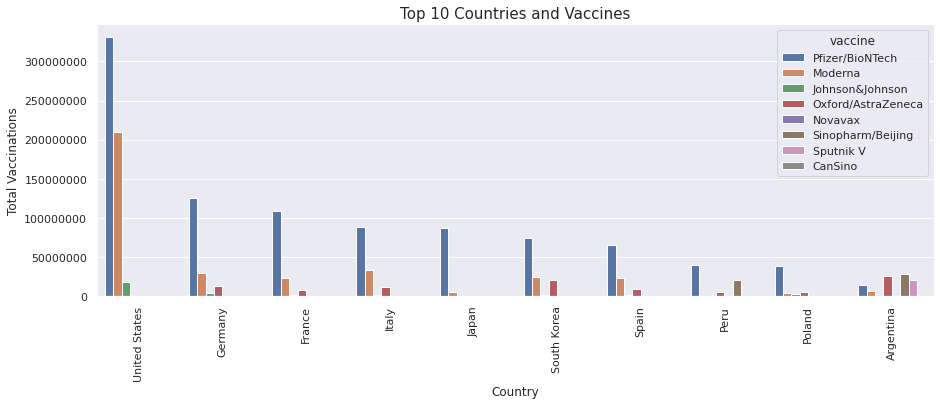

In [ ]:
# Plot total vaccinations per country using specific vaccine

sns.set(rc={"figure.figsize":(15, 5)})

barplot = sns.barplot(x='location', y='total_vaccinations', data=df,hue="vaccine")

barplot.ticklabel_format(style='plain', axis='y') #change scientific notation on x-axis to integer
barplot.tick_params(axis='x', rotation=90) #NV changed to not have overlapping country names
barplot.set_ylabel("Total Vaccinations", fontsize = 12) #label x-axis
barplot.set_xlabel("Country", fontsize = 12)  #label y-axis
barplot.set_title("Top 10 Countries and Vaccines", fontsize = 15);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

The below bar chart shows the bottom 10 countries with lowest total number of Covid-19 vaccinations across the globe. It can clearly be seen that Pfizer is still the most widely used vaccine in these countries against Covid except Uruguay.

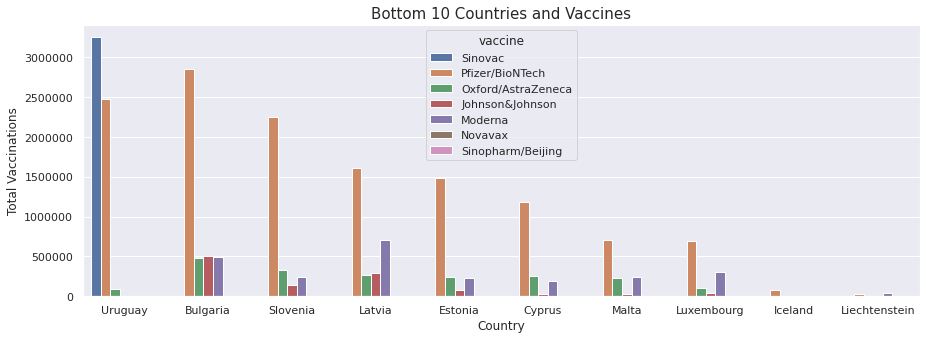

In [ ]:
df = company_vaccine_aggr
df['Rank']=df['country_max'].rank(ascending=True,method='dense')
df=df[df['Rank']<=10]

# Plot total vaccinations per country using specific vaccine
sns.set(rc={"figure.figsize":(15, 5)})

barplot = sns.barplot(x='location', y='total_vaccinations', data=df,hue="vaccine")

barplot.ticklabel_format(style='plain', axis='y') #change scientific notation on x-axis to integer
barplot.set_ylabel("Total Vaccinations", fontsize = 12) #label x-axis
barplot.set_xlabel("Country", fontsize = 12)  #label y-axis
barplot.set_title("Bottom 10 Countries and Vaccines", fontsize = 15);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

##### The following graph maps the top 10 countries using highest number of Pfizer/BioNTech vaccine. The x-axis shows the total Pfizer/BioNTech shots and y-axis shows the matching country. We can see that the United States is the biggest distributor of this brand.

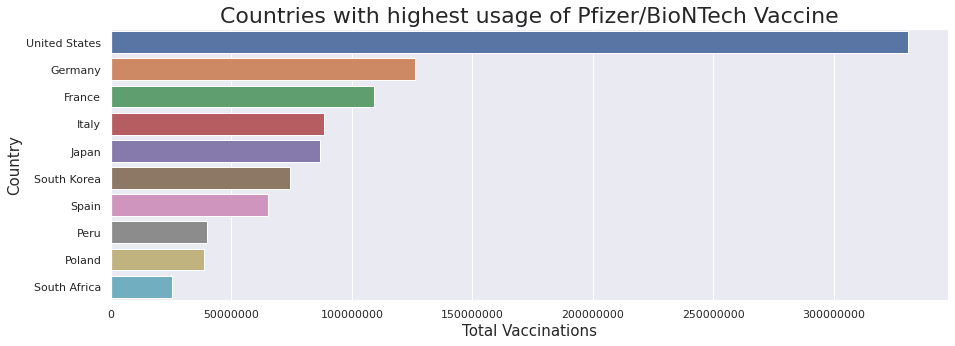

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Pfizer/BioNTech'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)
df_top10= df.head(10)
sns.set(rc={"figure.figsize":(15, 5)})
barplot = sns.barplot(y=df_top10.index, x='total_vaccinations', data=df_top10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with highest usage of Pfizer/BioNTech Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

The following graph maps the bottom 10 countries using lowest number of Pfizer/BioNTech vaccine. The x-axis shows the total Pfizer/BioNTech shots and y-axis shows the matching country. We can see that Liechtenstein is smallest distributor of this brand. It is worth to note that Liechtenstein is a small nation and there are 332 million more people living in the US than Liechtenstein. 

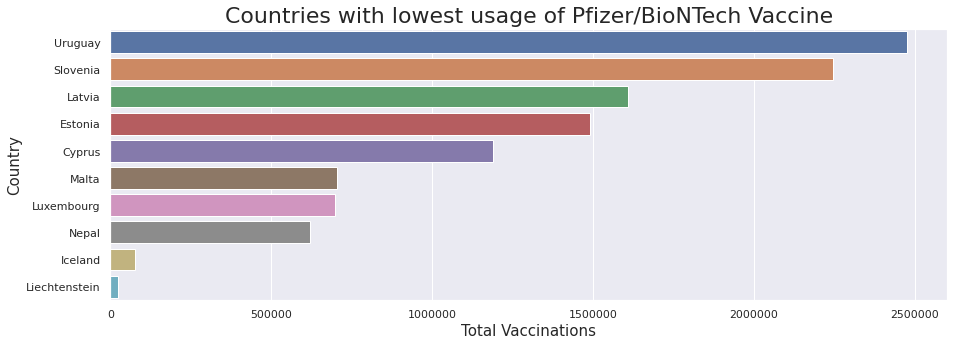

In [ ]:
# Plot total vaccinations per country using specific vaccine

df_tail10= df.tail(10)
barplot = sns.barplot(y=df_tail10.index, x='total_vaccinations', data=df_tail10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with lowest usage of Pfizer/BioNTech Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

#### The following graph maps the top 10 countries using highest number of Moderna vaccine. The x-axis shows the total Moderna shots and y-axis shows the matching country. We can see that the United States is still the biggest distributor of this brand. Comparing the use of Pfizer/BioNTech with Moderna in the US specifically, Moderna is used 30% less than Pfizer/BioNTech.

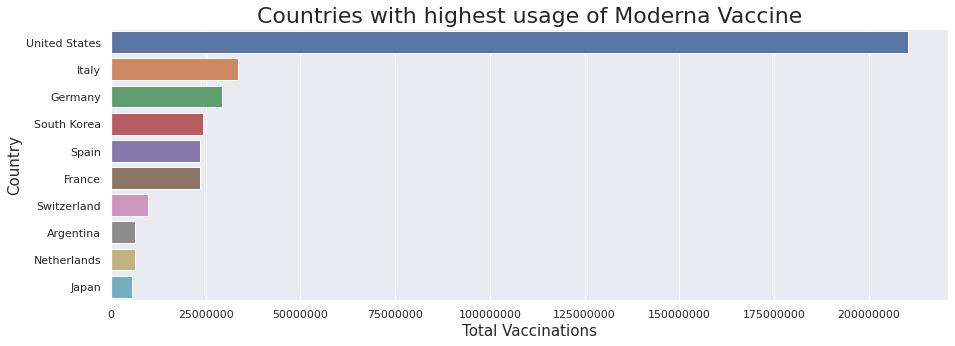

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Moderna'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)
df_top10= df.head(10)

barplot = sns.barplot(y=df_top10.index, x='total_vaccinations', data=df_top10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with highest usage of Moderna Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

The following graph maps the bottom 10 countries using lowest number of Moderna vaccine. The x-axis shows the total Moderna shots and y-axis shows the matching country. We can see that Iceland is smallest distributor of this brand. It is worth to note that Iceland also has a significantly smaller population in comparison to the US.

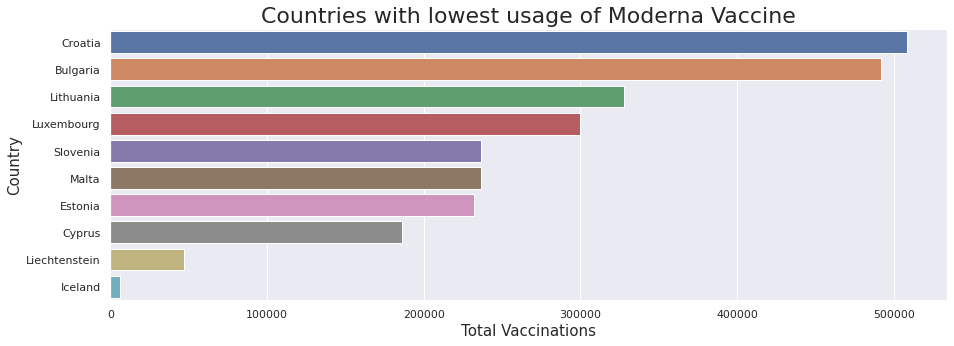

In [ ]:
df_tail10= df.tail(10)
barplot = sns.barplot(y=df_tail10.index, x='total_vaccinations', data=df_tail10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with lowest usage of Moderna Vaccine", fontsize = 22);

##### The following graph maps the top 10 countries using highest number of Oxford/AstraZeneca vaccine. The x-axis shows the total Oxford/AstraZeneca shots and y-axis shows the matching country. We can see that the Argentina is the biggest distributor of this brand, followed by South Korea. The US did not opt for Oxford/AstraZeneca vaccine and hence it is not visible in this list.

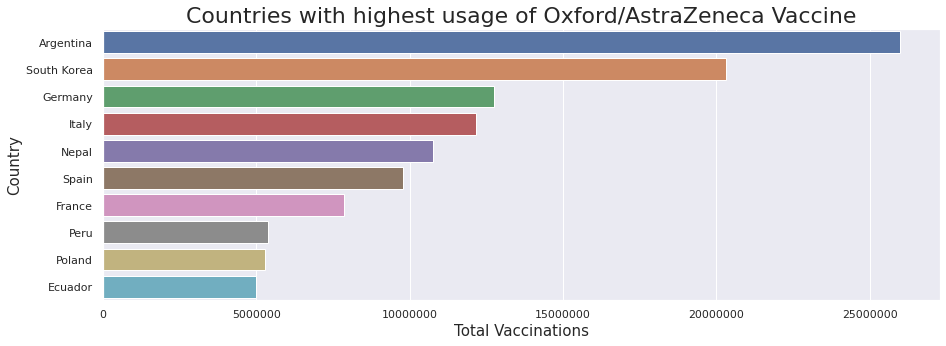

In [ ]:
# Plot total vaccinations per country using specific vaccine
df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Oxford/AstraZeneca'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)
df_top10= df.head(10)

barplot = sns.barplot(y=df_top10.index, x='total_vaccinations', data=df_top10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis

barplot.set_title("Countries with highest usage of Oxford/AstraZeneca Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

The following graph maps the bottom 10 countries using lowest number of Oxford/AstraZeneca vaccine. The x-axis shows the total Oxford/AstraZeneca shots and y-axis shows the matching country. We can see that Iceland is smallest distributor of this brand - almost negligible.

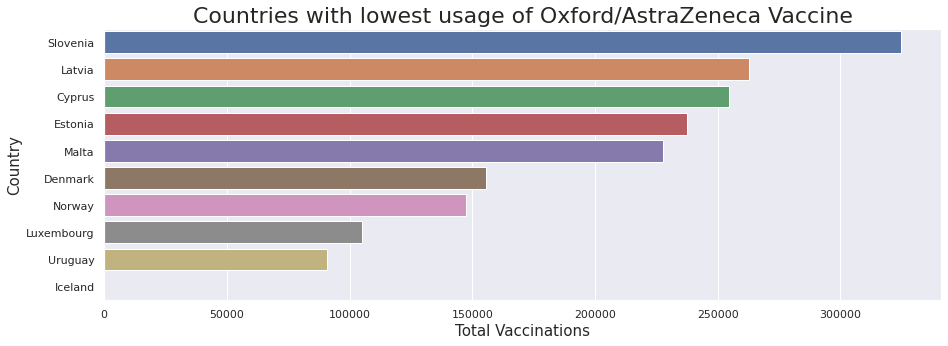

In [ ]:
df_tail10= df.tail(10)
barplot = sns.barplot(y=df_tail10.index, x='total_vaccinations', data=df_tail10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with lowest usage of Oxford/AstraZeneca Vaccine", fontsize = 22);

##### The following graph maps the top 10 countries using highest number of Johnson&Johnson (J&J) vaccine. The x-axis shows the total Johnson&Johnson (J&J) shots and y-axis shows the matching country. We can see that the United States is the biggest distributor of this brand, followed by South Africa. However, comparing the other vaccines used in the US, Johnson&Johnson (J&J) is used less than Pfizer/BioNTech and Moderna.

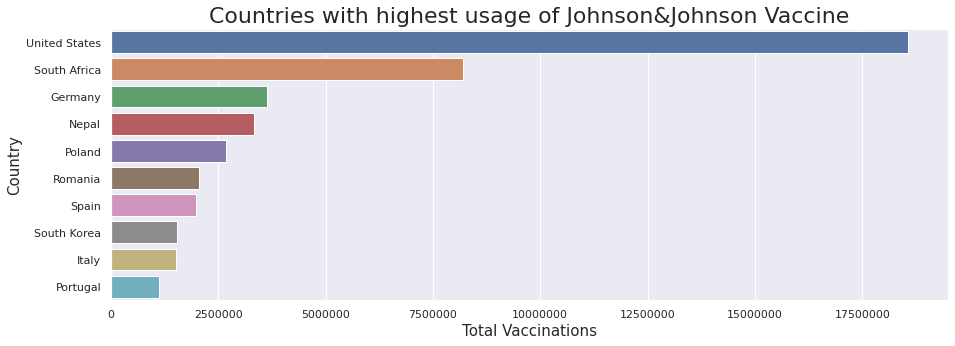

In [ ]:
# Plot total vaccinations per country using specific vaccine
df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Johnson&Johnson'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)
df_top10= df.head(10)

barplot = sns.barplot(y=df_top10.index, x='total_vaccinations', data=df_top10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis

barplot.set_title("Countries with highest usage of Johnson&Johnson Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

The following graph maps the bottom 10 countries using lowest number of Johnson&Johnson (J&J) vaccine. The x-axis shows the total Johnson&Johnson (J&J) shots and y-axis shows the matching country. We can see that Leichtenstein, Iceland and Finland are the smallest distributor of this brand - almost negligible.

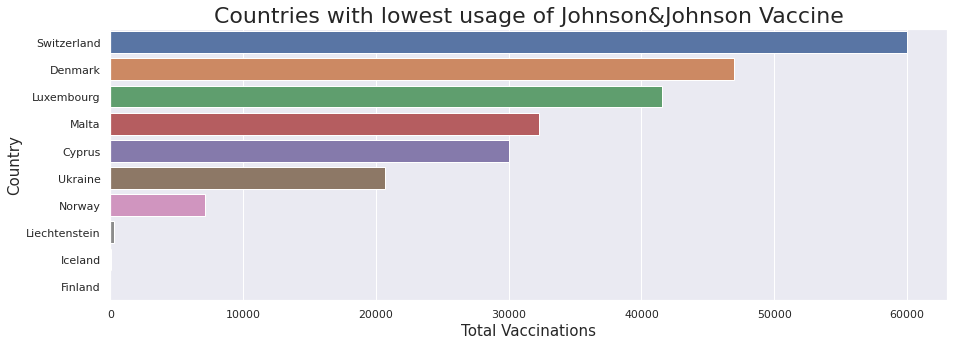

In [ ]:
df_tail10= df.tail(10)
barplot = sns.barplot(y=df_tail10.index, x='total_vaccinations', data=df_tail10)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with lowest usage of Johnson&Johnson Vaccine", fontsize = 22);

##### The following graph plots countries using the Sinovac vaccine. The x-axis shows the total vaccinations and y-axis the matching country. This vaccine is only used relatively significant in 5 countries with Chile as the biggest one.

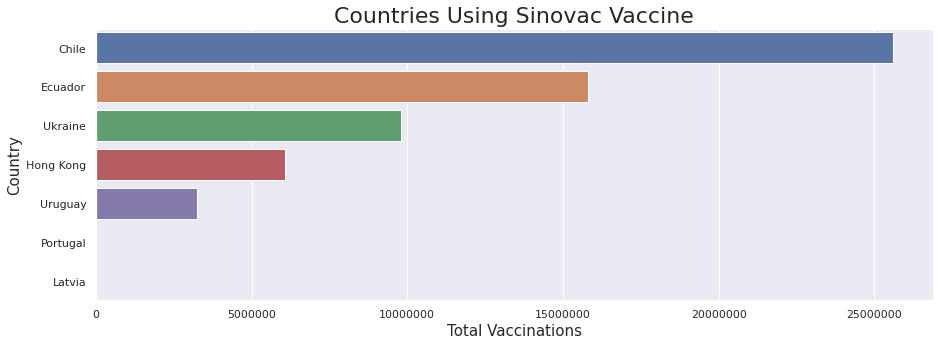

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Sinovac'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)

barplot = sns.barplot(y=df.index, x='total_vaccinations', data=df)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries Using Sinovac Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

##### The following two graphs below give an overview of countries using the Novavax vaccine. The x-axis shows the total vaccinations and y-axis the matching country. The first graph shows the top 10 countries using highest number of Johnson&Johnson (J&J) vaccine. The second graph is a continuation of the list as there are not many countries using Novavx in general. Hence, the second graph has some overlaps and zooms into the countries on the bottom of the list that uses Novavax vaccine. 

It can concluded that this vaccine is only used most significantly in 3 countries like South Korea, Germany, and Italy, with South Korea being the largest distributor.

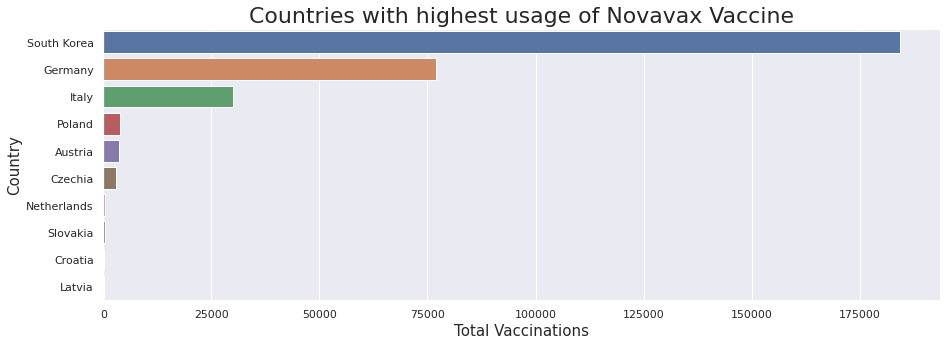

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Novavax'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)

df_top10= df.head(10)
barplot = sns.barplot(y=df_top10.index, x='total_vaccinations', data=df_top10)
barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with highest usage of Novavax Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

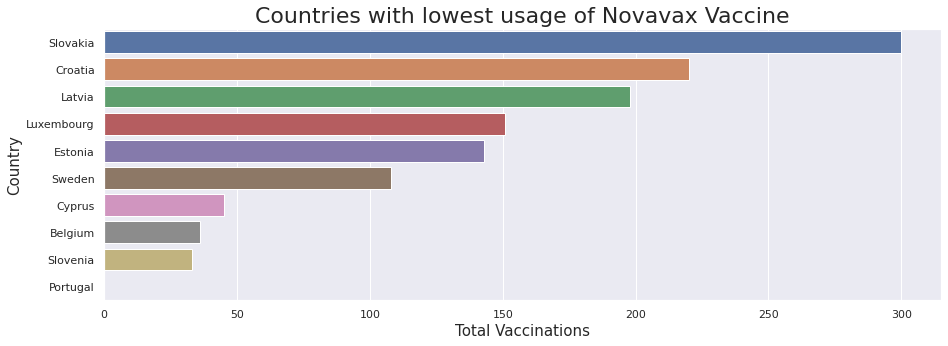

In [ ]:
df_tail10= df.tail(10)
barplot = sns.barplot(y=df_tail10.index, x='total_vaccinations', data=df_tail10)
barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries with lowest usage of Novavax Vaccine", fontsize = 22);

##### The following graph plots countries using the Sinopharm vaccine. The x-axis shows the total vaccinations and y-axis the matching country. This vaccine isn’t largely distributed over the world. We can see the Argetina, Peru and Nepal are the main countries using this brand.


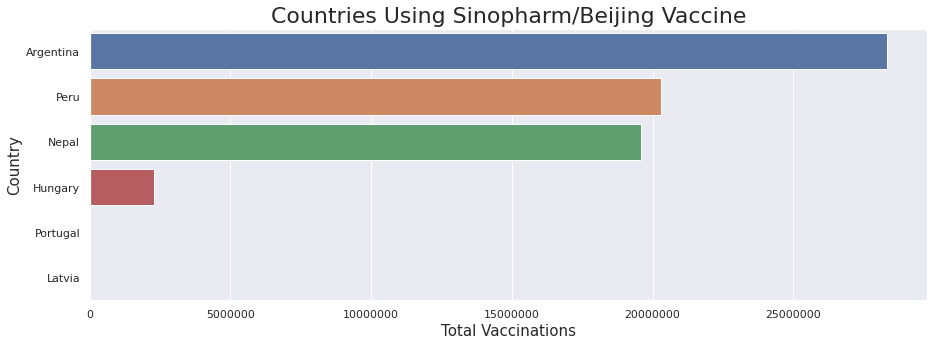

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Sinopharm/Beijing'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)

barplot = sns.barplot(y=df.index, x='total_vaccinations', data=df)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries Using Sinopharm/Beijing Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

##### This graph maps out the countries distributing Sputnik, which is mostly used in Argentina.


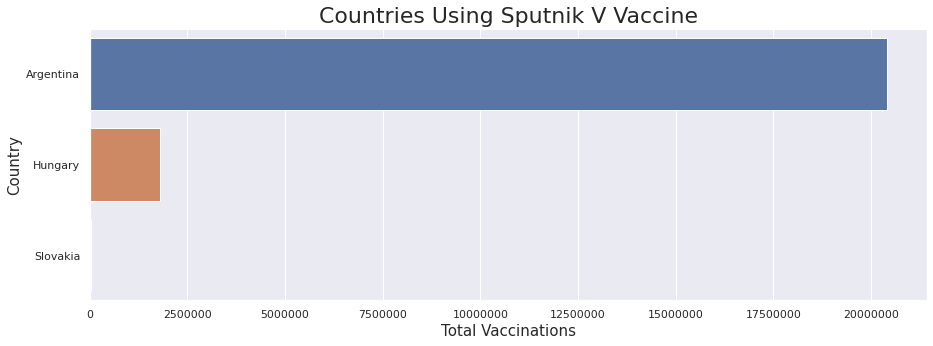

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Sputnik V'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)

barplot = sns.barplot(y=df.index, x='total_vaccinations', data=df)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries Using Sputnik V Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

##### We can see in this graph that CanSino is only used in 3 countries: Argentina, Chile and Ecuador

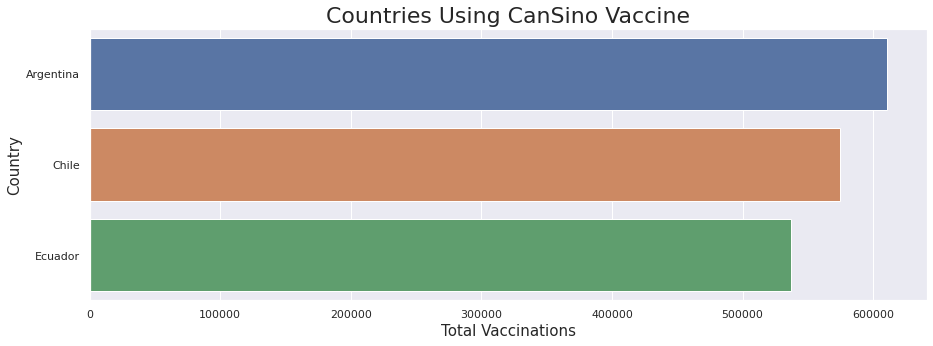

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['CanSino'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)

barplot = sns.barplot(y=df.index, x='total_vaccinations', data=df)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries Using CanSino Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

This graphs shows us that Covaxin is only used in Portugal.

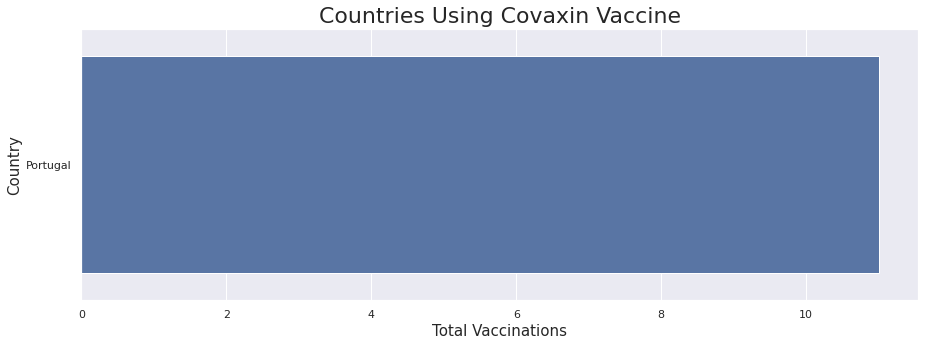

In [ ]:
# Plot total vaccinations per country using specific vaccine

df = company_vaccine_aggr.set_index(['location','vaccine'])
df=df[df.index.get_level_values('vaccine').isin(['Covaxin'])].droplevel(1)

df.sort_values(by='total_vaccinations', ascending=False, inplace=True)

barplot = sns.barplot(y=df.index, x='total_vaccinations', data=df)

barplot.ticklabel_format(style='plain', axis='x') #change scientific notation on x-axis to integer
barplot.set_xlabel("Total Vaccinations", fontsize = 15) #label x-axis
barplot.set_ylabel("Country", fontsize = 15)  #label y-axis
barplot.set_title("Countries Using Covaxin Vaccine", fontsize = 22);  #set chart title
#plt.xlim(0, 650000000) #set same x-axis across other vaccines

In [ ]:
company_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
new_company_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9046 entries, ('Argentina', '2020-12-29') to ('Uruguay', '2022-03-29')
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CanSino             9046 non-null   float64
 1   Covaxin             9046 non-null   float64
 2   Johnson&Johnson     9046 non-null   float64
 3   Moderna             9046 non-null   float64
 4   Novavax             9046 non-null   float64
 5   Oxford/AstraZeneca  9046 non-null   float64
 6   Pfizer/BioNTech     9046 non-null   float64
 7   Sinopharm/Beijing   9046 non-null   float64
 8   Sinovac             9046 non-null   float64
 9   Sputnik V           9046 non-null   float64
dtypes: float64(10)
memory usage: 754.6+ KB


Text(0.5, 1.0, 'Daily Vaccination Trends over Time')

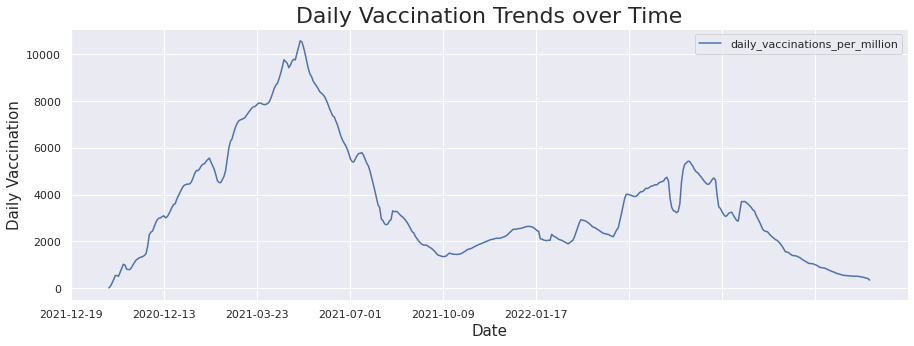

In [ ]:
# Plot graph of daily vaccinations vs time for a specific country

import matplotlib.ticker as ticker

graph = country_vaccine[country_vaccine.country == 'United States'].plot(x = "date", y = "daily_vaccinations_per_million")

graph.xaxis.set_major_locator(ticker.LinearLocator(10)) #adjust x-axis label to make it readable
graph.ticklabel_format(style='plain', axis='y') #change scientific notation on y-axis to integer
graph.set_xlabel("Date", fontsize = 15) #label x-axis
graph.set_ylabel("Daily Vaccination", fontsize = 15)  #label y-axis
graph.set_title("Daily Vaccination Trends over Time", fontsize = 22)  #set chart title

Here above is a line graph depicting the Daily Vaccination Trends over time, starting December 2021 through January 2022.

After cleaning up the data, we wanted to understand the trends of daily vaccine rates overtime as we noticed a quick decline among populations. It was an obvious prediction of decrease in speed given the number of people whom already received their initial shots, but also political climate effects. There was a continous global vaccine hesitancy that slowed down most countries' progress in vaccination rates. Thus causing more federal government rules and regulations regarding vaccine requirements, which can explain the downward trend you can see within this graph.

Eventually, we can expect that daily vaccinations to hit 0, once everyone becomes fully vaccinated.

Once we have a general understanding of the daily vaccinations trend over time, we wanted to zoom into specific countries in the top 10 and bottom 100 with regards to GDP ranking to identify similarities and differences.

As expected, countries with high GDP like China, India, United States, and Japan dominates other countries considered in this list when it comes to daily vaccination. 


Text(0.5, 1.0, 'Daily Vaccination Trends over Time')

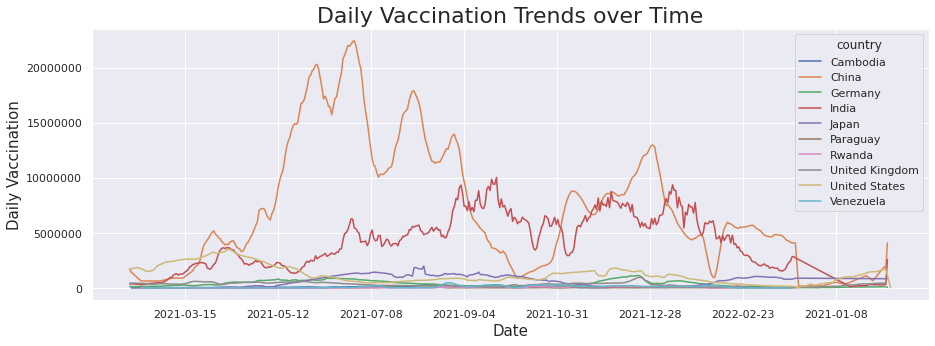

In [ ]:
# Plot graph of daily vaccinations vs time for multiple countries for comparison
import matplotlib.ticker as ticker

# Chosen top 5 countries and bottom 100 countries by GDP rank 
chart = sns.lineplot(data=country_vaccine[country_vaccine.country.isin(['United States', 'Japan', 'Germany', 'United Kingdom','Venezuela','Rwanda','Paraguay','Cambodia','India','China'])], 
                     x='date', y='daily_vaccinations', hue='country')

chart.xaxis.set_major_locator(ticker.LinearLocator(10)) #adjust x-axis label to make it readable
chart.ticklabel_format(style='plain', axis='y') #change scientific notation on y-axis to integer
chart.set_xlabel("Date", fontsize = 15) #label x-axis
chart.set_ylabel("Daily Vaccination", fontsize = 15)  #label y-axis
chart.set_title("Daily Vaccination Trends over Time", fontsize = 22)  #set chart title

The line chart above on "daily vaccinations" gave accurate results based on the volume. However, we chose to modify the visualization to "daily vaccination per million" to better understand the coverage of these vaccines within specific countries as can be seen in the chart below.

Text(0.5, 1.0, 'Daily Vaccination Trends over Time (per million)')

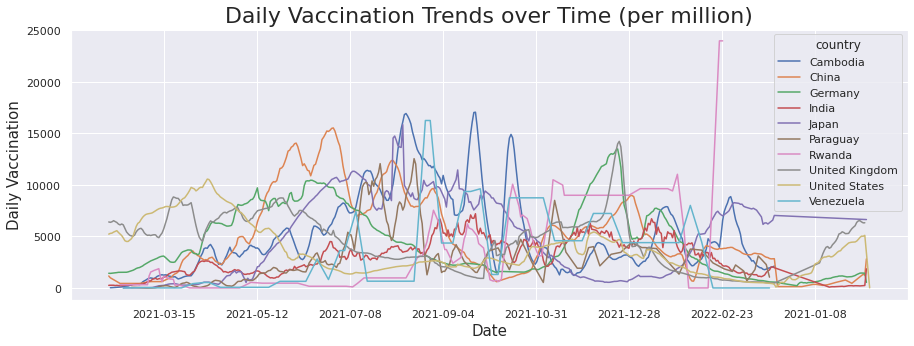

In [ ]:
# Plot graph of daily vaccinations vs time for multiple countries for comparison
import matplotlib.ticker as ticker

# Chosen top 5 countries and bottom 100 countries by GDP rank 
chart = sns.lineplot(data=country_vaccine[country_vaccine.country.isin(['United States','China', 'Japan', 'Germany', 'United Kingdom','Venezuela','Rwanda','Paraguay','Cambodia','India'])], 
                     x='date', y='daily_vaccinations_per_million', hue='country')

chart.xaxis.set_major_locator(ticker.LinearLocator(10)) #adjust x-axis label to make it readable
chart.ticklabel_format(style='plain', axis='y') #change scientific notation on y-axis to integer
chart.set_xlabel("Date", fontsize = 15) #label x-axis
chart.set_ylabel("Daily Vaccination", fontsize = 15)  #label y-axis
chart.set_title("Daily Vaccination Trends over Time (per million)", fontsize = 22)  #set chart title

The graph above shows that top countries in the GDP ranking (United States,China, Japan, Germany, United Kingdom, India) has a higher growth rate in daily vaccination from the initial point. 

However, the bottom countries in the GDP ranking (Venezuela, Rwanda, Paraguay,Cambodia) are delayed in their growth rate in daily vaccinations about 6 months after the top countries in the GDP ranking.  

## GeoGraph Preparation

In [ ]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px   #interactive graph that oyou can hover over

In [ ]:
# Downsizing the table for relevant columns
country_vaccine_ffill = country_vaccine[['country', 'iso_code', 'people_fully_vaccinated_per_hundred', 'date']]
country_vaccine_ffill = country_vaccine_ffill.sort_values(by = 'date', ascending = True)

# Creating helper variables for the for loop
country_name_list = country_vaccine_ffill.country.unique()
df_list = []

# Main loop to forward fill people_fully_vaccinated_per_hundred by country
for country in country_name_list:
  temp_table = country_vaccine_ffill[country_vaccine_ffill.country == country]
  # Making sure that we don't forward fill NaN but instead we forward fill 0 if the first value is NaN
  if pd.isna(temp_table.people_fully_vaccinated_per_hundred.iloc[0]):
    temp_table.people_fully_vaccinated_per_hundred.iloc[0] = 0
  temp_table = temp_table.ffill(axis=0)
  df_list.append(temp_table)

country_vaccine_ffill = pd.concat(df_list)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# Convert 'date' column from object type to datetime64 type
country_vaccine_ffill["date"] = pd.to_datetime(country_vaccine_ffill["date"])

In [ ]:
# Filter out dates from 2022-02-23 onwards
filtered_country_vaccine_ffill = country_vaccine_ffill[country_vaccine_ffill['date'] < '2022-02-23'] 

In [ ]:
# Convert 'date' column from datetime64 type to object type
filtered_country_vaccine_ffill['date'] = filtered_country_vaccine_ffill['date'].dt.strftime('%Y-%m-%d');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Geographing Fully Vaccinated Populations Overtime

In [ ]:
fig = px.choropleth(filtered_country_vaccine_ffill, locations="iso_code", color="people_fully_vaccinated_per_hundred", 
                    hover_name="country", animation_frame="date", color_continuous_scale='Plasma_r', range_color=[0,130])
fig.show()

## Exploratory Data Analysis Summary
As we see overtime, the first countries providing vaccines are Russia, USA, Canada and Asian countries, where 10% of their citizens received a jab and fully vaccinated. 6 months later, we can see on the map that the rest of the world starts giving vaccinations, resulting in 10 per hundred  fully vaccinations citizens in Africa, 10% in Europe, 40%  in Russia and 50% in the USA. 1 year later, Canada, Australia and China are best in class and Africa is still lacking behind. The same is true for 15 months later since start.

By the end of 2021, despite North America having the headstart for fully vaccinated people, the EU quickly responds and surpasses from a global standpoint. After some extensive research regarding their rollout plans, it appears that the EU invested in the acceleration of vaccine companies to secure vaccine availability for their countrymen (https://ec.europa.eu/commission/presscorner/detail/en/fs_20_1911). Having multiple vaccines available to everyone allowed their union to get ahead on becoming a fully vaccinated population.

Africa does not appear to have a vigilant response towards COVID vaccines and is stated in having: "poor health infrastructure, a lack of funding for training and deploying medical staff, as well as vaccine storage issues" as contributing factors. (https://www.bbc.com/news/56100076)

Much of the decline in vaccination rates have been reported under the theory of vaccine hesitancy given the severity of the pandemic, number of discovered COVID strains, as well as the emergency use of vaccines that were pending FDA approval.


# **Next Steps**
Our goal is to track COVID-19 vaccine adoption in the World. We will further analyze the rate of people getting vaccinated per day in each country and the types of vaccine used by incorporating the financial impacts. We planned to include pricing and vaccine availability (on a regression model) to further predict the progress of vaccination and immunization status in these countries. In terms of cleansing the data, we plan to filter out the zero's from the dataset.

# **Data Modelling**

### Additional Datasets
We were able to find accurate Pricing trends from the [COVID-19 Vaccine Market Dashboard](https://www.unicef.org/supply/covid-19-vaccine-market-dashboard). However, due to inconsistency in the formatting and metrics available in the initial datasets, we were unable to include pricing trends and measure its impact on vaccination and immunization status.

In [ ]:
#vaccine_pricing = pd.read_csv("drive/MyDrive/Business Analytics_IS833_Team Project/Vaccine_Pricing.csv") 
#vaccine_pricing.head()

In [ ]:
#vaccine_pricing=vaccine_pricing.groupby(['vaccine'])[['Price per dose']].mean()
#vaccine_pricing.reset_index(inplace=True)
#vaccine_pricing

### Data Preparation for Modelling

1. Before applying any machine learning model, we did a quick check to get a sense of the predictive power of our features.
Hence, we used the backward elimination method, to remove the features that were not statistically significant. Upon using this method, we found that all variables were statistically significant, and hence did not have to drop any feature.
2. Then we split the data into independant and dependant variables, with our dependant or target variable being vax_predict, which is based on column fully vaccinated people per 100.
3. Next we split the data into train and test with a 70-30 split, and apply different models to it.
4. Logistic Regression-
The accuracy for Logistic Rgression model is the highest which is 99.4%; 
TPR (Specificity) is 99.92%;
TNR sensitivity is 99.95%.
5. Further, we apply the GaussianNB model and get an accuracy score of 96.87%, Specificity of 98.71% and Sensitivity of 95.47%
6. Overall, we see that Logistic Regression is the most suited model and provides the best results.

In [ ]:
# Downsizing the table for relevant columns
#country_vaccine_ffill = country_vaccine[['country', 'iso_code', 'people_fully_vaccinated_per_hundred', 'date']]
country_vaccine_ffill = country_vaccine[['country', 'iso_code', 'date', 
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]
country_vaccine_ffill = country_vaccine_ffill.sort_values(by = 'date', ascending = True)

# Creating helper variables for the for loop
country_name_list = country_vaccine_ffill.country.unique()
df_list = []

# Main loop to forward fill people_fully_vaccinated_per_hundred by country
for country in country_name_list:
  temp_table = country_vaccine_ffill[country_vaccine_ffill.country == country]
  # Making sure that we don't forward fill NaN but instead we forward fill 0 if the first value is NaN
  if pd.isna(temp_table.people_fully_vaccinated_per_hundred.iloc[0]):
    temp_table.people_fully_vaccinated_per_hundred.iloc[0] = 0
  temp_table = temp_table.ffill(axis=0)
  df_list.append(temp_table)

country_vaccine_ffill = pd.concat(df_list)
country_vaccine_ffill.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country iso_code        date  total_vaccinations_per_hundred  \
58517  Norway      NOR  2020-12-02                             0.0   
58518  Norway      NOR  2020-12-03                             0.0   
58519  Norway      NOR  2020-12-04                             0.0   
58520  Norway      NOR  2020-12-05                             0.0   
58521  Norway      NOR  2020-12-06                             0.0   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
58517                            0.0                                  0.0   
58518                            0.0                                  0.0   
58519                            0.0                                  0.0   
58520                            0.0                                  0.0   
58521                            0.0                                  0.0   

       daily_vaccinations_per_million  
58517                             NaN  
58518                             0.0  
58519                             0.0  
58520                             0.0  
58521                             0.0

In [ ]:
country_vaccine_ffill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86512 entries, 58517 to 12644
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations_per_hundred       86481 non-null  float64
 4   people_vaccinated_per_hundred        85725 non-null  float64
 5   people_fully_vaccinated_per_hundred  86512 non-null  float64
 6   daily_vaccinations_per_million       86258 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.3+ MB


In [ ]:
cols = ['total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million']
country_vaccine_ffill = country_vaccine_ffill.sort_values(cols).groupby(cols, as_index=False).max()

In [ ]:
#country_vaccine_ffill.loc[(country_vaccine_ffill['people_fully_vaccinated_per_hundred'] <= 50) & (country_vaccine_ffill['people_fully_vaccinated_per_hundred'] >=10), 'fully_vaccinated_groups'] = 1
country_vaccine_ffill.loc[country_vaccine_ffill['people_fully_vaccinated_per_hundred'] <= country_vaccine_ffill['people_fully_vaccinated_per_hundred'].mean(), 'fully_vaccinated_groups'] = 0
country_vaccine_ffill.loc[country_vaccine_ffill['people_fully_vaccinated_per_hundred'] > country_vaccine_ffill['people_fully_vaccinated_per_hundred'].mean() , 'fully_vaccinated_groups'] = 1
country_vaccine_ffill.head()

total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  0.0                             0.0   
1                                  0.0                             1.0   
2                                  0.0                             2.0   
3                                  0.0                             3.0   
4                                  0.0                             4.0   

       country iso_code        date  fully_vaccinated_groups  
0  Switzerland      NZL  2021-02-18                      0.0  
1    Venezuela      VEN  2021-02-22                      0.0  
2     Thailand      THA  2021-04-13                      0.0  
3      Vietnam      VNM  2021-04-28                      0.0  
4      Vietnam      VNM  2021-10-28                      0.0

In [ ]:
df=country_vaccine_ffill.drop(['country','iso_code','date'],axis=1)
#df['date'] = pd.to_datetime(df['date'])
df.fillna(0,inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70279 entries, 0 to 70278
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations_per_hundred       70279 non-null  float64
 1   people_vaccinated_per_hundred        70279 non-null  float64
 2   people_fully_vaccinated_per_hundred  70279 non-null  float64
 3   daily_vaccinations_per_million       70279 non-null  float64
 4   fully_vaccinated_groups              70279 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
fully_vaccinated_groups                0
dtype: int64

In [ ]:
df.rename(columns = {'total_vaccinations_per_hundred':'t_vax_rate', 'people_vaccinated_per_hundred':'people_vax',
                              'people_fully_vaccinated_per_hundred':'people_2_vax','daily_vaccinations_per_million':'daily_rate','fully_vaccinated_groups':'vax_predict'}, inplace = True)

In [ ]:
#df['date']=df['date'].astype('int')

In [ ]:
import pandas as pd

writer = df.to_excel("output.xlsx",
             sheet_name='Sheet_name_1',index=False)

We tried to include the time period in the model, however, the data quality is still not consistent for different countries over specific durations. With such limitations, we decided to incorporate the features only for the latest available date.
We observed (while running regression analysis in Excel) that all the independent variables are statistically significant, such that, p <= 5% and T stat >=2.

### Correlation Coefficients and Features Matrix

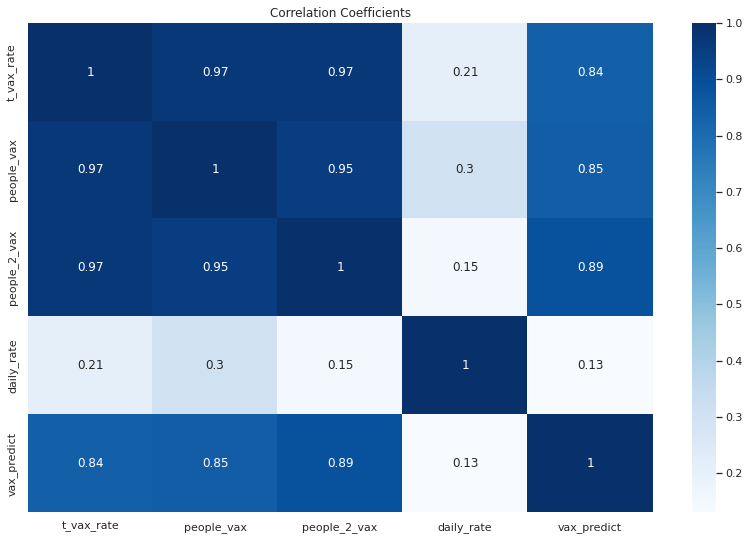

In [ ]:
corrMatrix = round(df.corr(),2)
sns.set(rc={'figure.figsize':(14,9)})
corr_heatmap=sns.heatmap(corrMatrix, annot=True,cmap="Blues")
corr_heatmap.set_title('Correlation Coefficients');
plt.show()

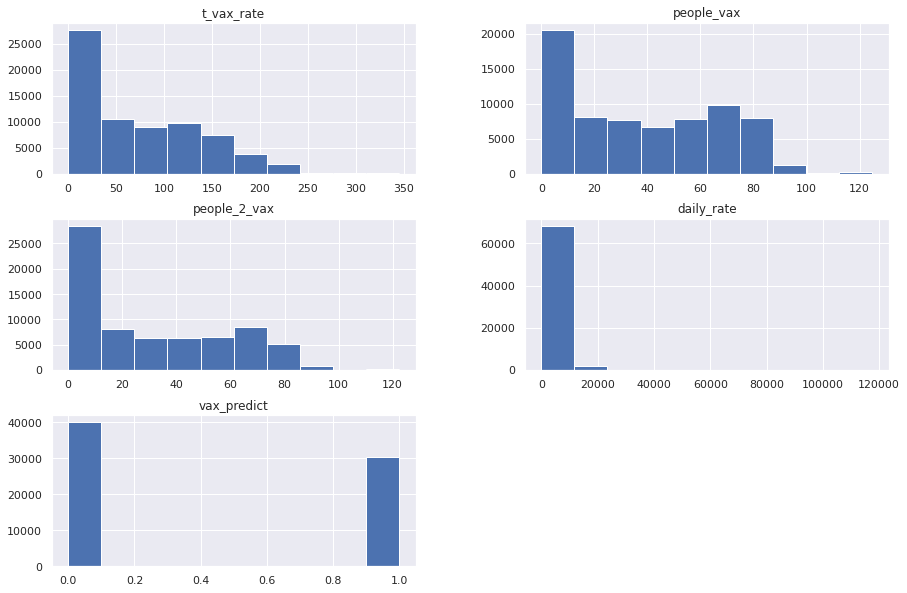

In [ ]:
df.hist(figsize=(15,10),bins=10)
plt.show()

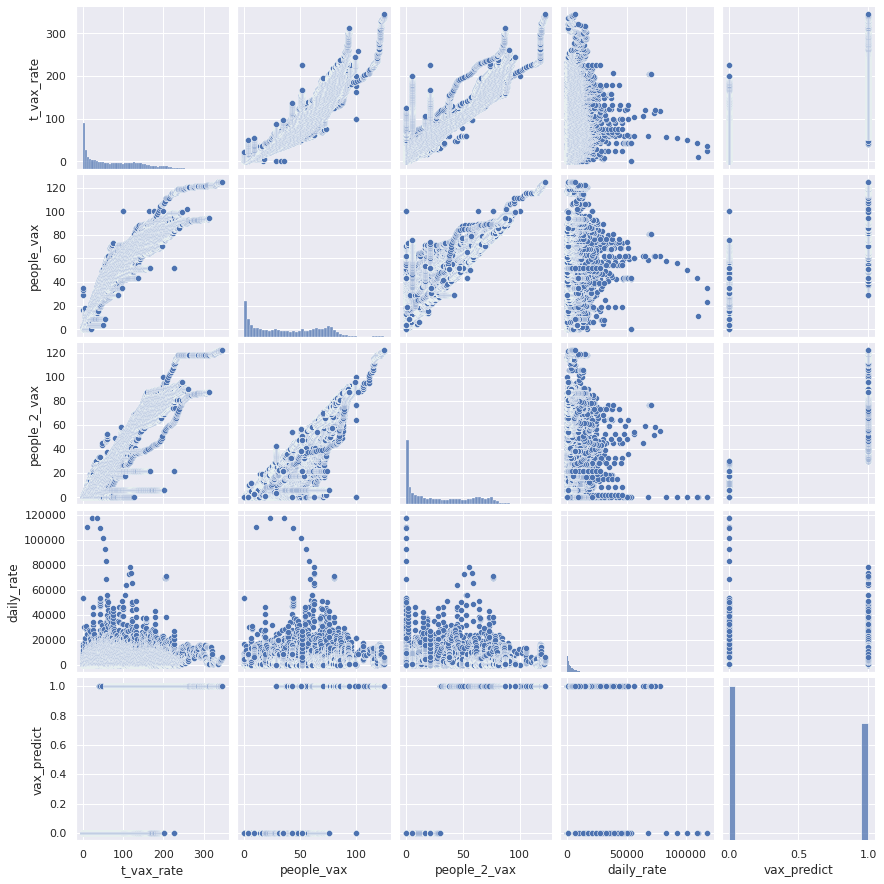

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("Spectral", as_cmap=True)
sns.pairplot(df)

#### Splitting Test & Train Dataset

In [ ]:
y = df['vax_predict']
X=df.drop('vax_predict', axis=1)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

#### Modelling using Logistic Regression and Checking accuracy 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
model = LogisticRegression(solver='liblinear')        # 2. instantiate model
model.fit(Xtrain, ytrain)                             # 3. fit model to data
y_model = model.predict(Xtest)                        # 4. predict on new data
accuracy_score(ytest, y_model)

0.9994308480364257

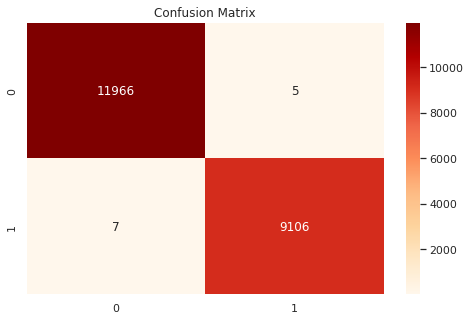

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
conf_matrix=confusion_matrix(ytest,y_model)
conf_heatmap=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="OrRd")
conf_heatmap.set_title('Confusion Matrix');
plt.show()

In [ ]:
P = sum(ytest == 1)
TP = sum((ytest == 1) & (y_model == 1))
TPR =TP/P
TPR

0.9992318665642489

In [ ]:
N = sum(ytest == 0)
TN = sum((ytest == 0) & (y_model == 0))
TNR=TN/N
TNR

0.9995823239495447

#### Modelling using Gaussian Naive Bayes and Checking accuracy 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
model = GaussianNB()         # 2. instantiate model
model.fit(Xtrain, ytrain)                             # 3. fit model to data
y_model = model.predict(Xtest)                        # 4. predict on new data
accuracy_score(ytest, y_model)

0.9687440713337128

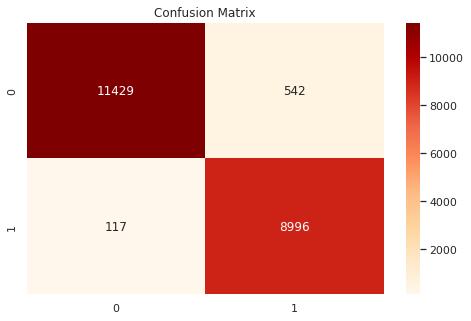

In [ ]:
conf_matrix=confusion_matrix(ytest,y_model)
conf_heatmap=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="OrRd")
conf_heatmap.set_title('Confusion Matrix');
plt.show()

In [ ]:
P = sum(ytest == 1)
TP = sum((ytest == 1) & (y_model == 1))
TPR =TP/P
TPR

0.9871611982881597

In [ ]:
N = sum(ytest == 0)
TN = sum((ytest == 0) & (y_model == 0))
TNR=TN/N
TNR

0.9547239161306491

#### Modelling using Decision Tree Classifier and Checking accuracy 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score
model = DecisionTreeClassifier()        # 2. instantiate model
model.fit(Xtrain, ytrain)                             # 3. fit model to data
y_model = model.predict(Xtest)                        # 4. predict on new data
accuracy_score(ytest, y_model)

1.0

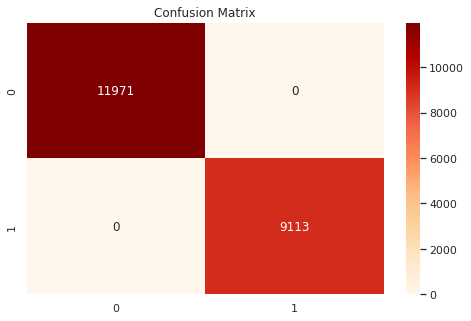

In [ ]:
conf_matrix=confusion_matrix(ytest,y_model)
conf_heatmap=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="OrRd")
conf_heatmap.set_title('Confusion Matrix');
plt.show()

In [ ]:
P = sum(ytest == 1)
TP = sum((ytest == 1) & (y_model == 1))
TPR =TP/P
TPR

1.0

In [ ]:
N = sum(ytest == 0)
TN = sum((ytest == 0) & (y_model == 0))
TNR=TN/N
TNR

1.0

# **Recommendation**

Through the analysis of this dataset, we have the following recommendations:

* In order to make better  financial estimations for vaccination strategies, we recommend including data for features, such as, pricing, dosage frequency, dosage amount (ml), logistic limitations, etc. 
* Based on further analysis, we observed that the data for African countries is available and we recommend including the details from other reliable data sources. African countries have the vaccination rate of below 10% threshold but was not reflected in the dataset we analyzed.([ref](https://www.npr.org/sections/goatsandsoda/2022/01/14/1072188527/for-the-36-countries-with-the-lowest-vaccination-rates-supply-isnt-the-only-issu)). With improved dataset, the model would recommend increase in the vaccination rate in African countries.




  Increase the vaccination rate in Uruguay, Bulgaria, Slovenia, Latvia, Estonia, Cyprus, Malta, Luxembourg, Iceland, Liechtenstein. These are countries with lowest vaccination rates.

  We should encourage countries to keep vaccinating citizens with at least 2 doses of vaccine (3 doses encouraged) in order to fight against any new variant of Corona virus.
  Big brands like Pfizer, Moderna, Astrazeneca should produce more vaccine and distribute non-profitably to countries (like African countries).



# **Dashboard**
 COVID-19 Vaccinations Dashboard - [Google Studio](https://datastudio.google.com/reporting/4f23f58f-1267-4ae3-be67-5d6cde12ab8f)

 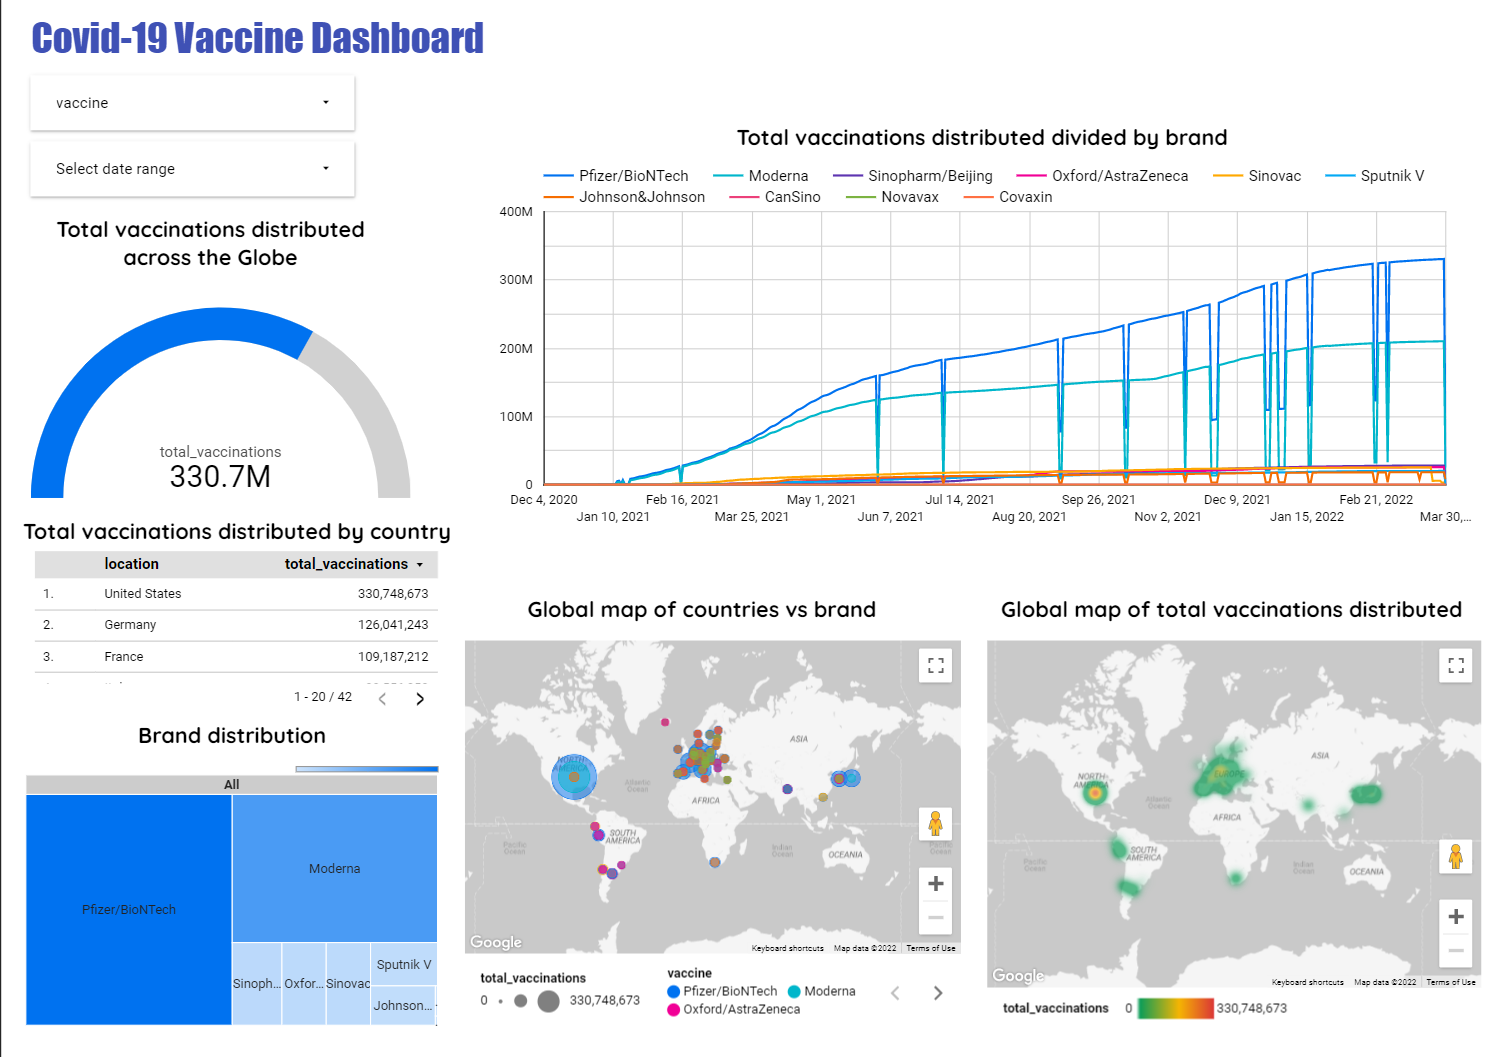